In [2]:
from tensorflow.keras import models, layers, optimizers

# 활성화 함수화 초기화에 따라 변화될수 있는 모델 함수 생성
def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4', 
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5', 
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

# 레이어마다 분포값을 히스토그램으로 출력하는 함수작성

def show_layer(model):
  input = np.random.randn(400, 20)

  plt.figure(figsize=(12, 6))
  for i in range(1, 6):
    name = 'hidden' + str(i)
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    plt.hist(input, 20, range=(-1, 1))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

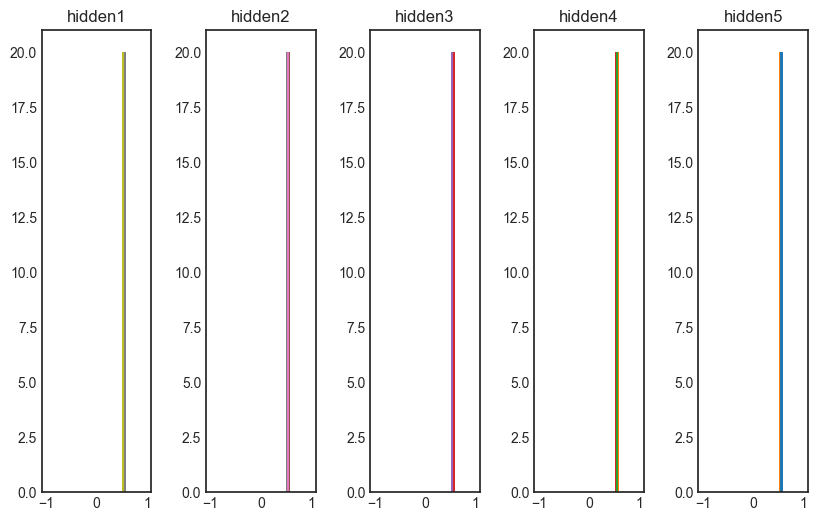

In [5]:
from tensorflow.keras import initializers, activations

# initalizers.Zeros()를 사용해 가중치를 제로값으로 초기화
model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


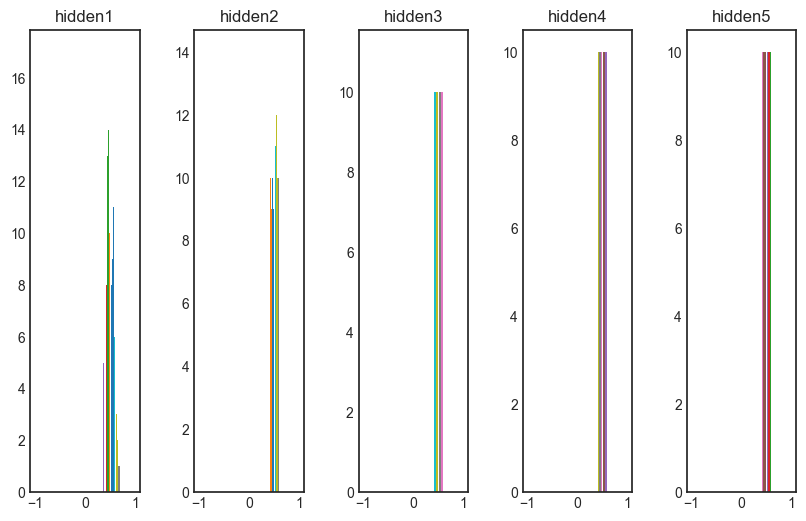

In [6]:
# initailizers.RandomNormal()를 통해 정규분포를 따르도록 무작위 값을 초기화
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


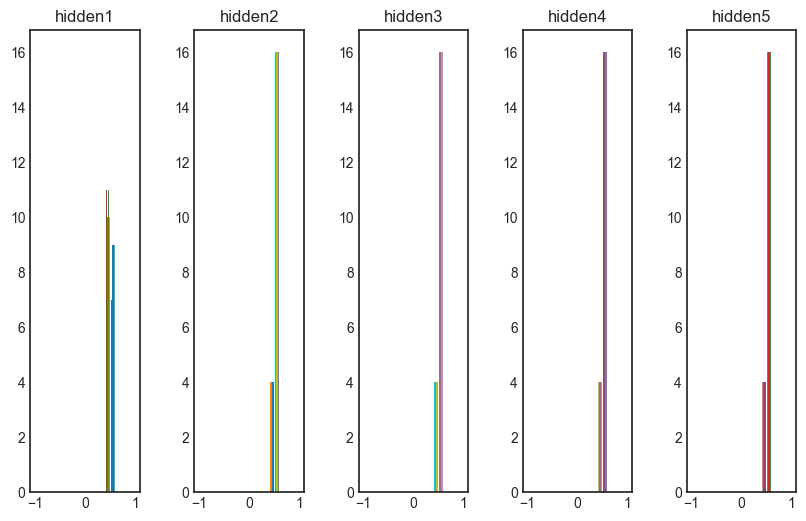

In [7]:
# 균일분포 초기화
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


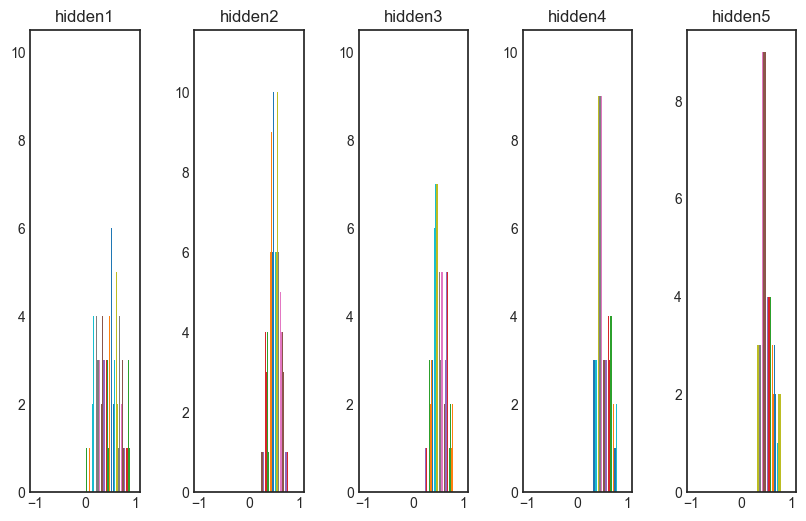

In [8]:
# Xavier(Glorot) 정규분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

* 일반적으로 Xavier(Glorot) 방법은 활성화 함수가 선형함수인 경우에 매우 적합

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


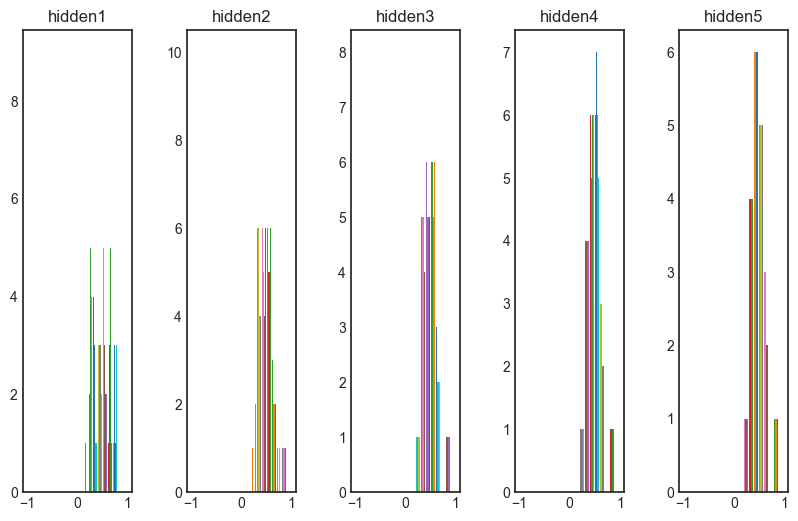

In [9]:
# Xavier(Glorot) 균일분포 초기화
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

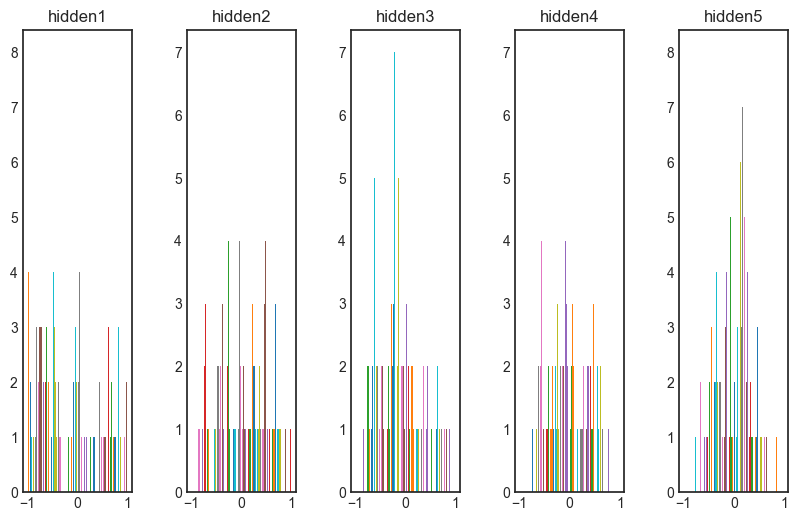

In [10]:
# sigmoid 대신 tanh 사용
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

* sigmoid 보다 tanh 가 좀더 균일한 분포를 보여줌

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


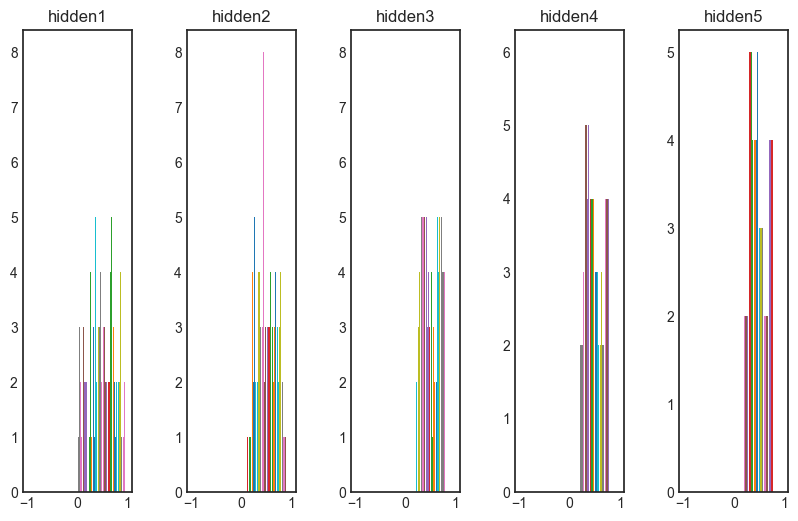

In [11]:
# He 정규분포 초기화
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

C:\Users\008yo\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


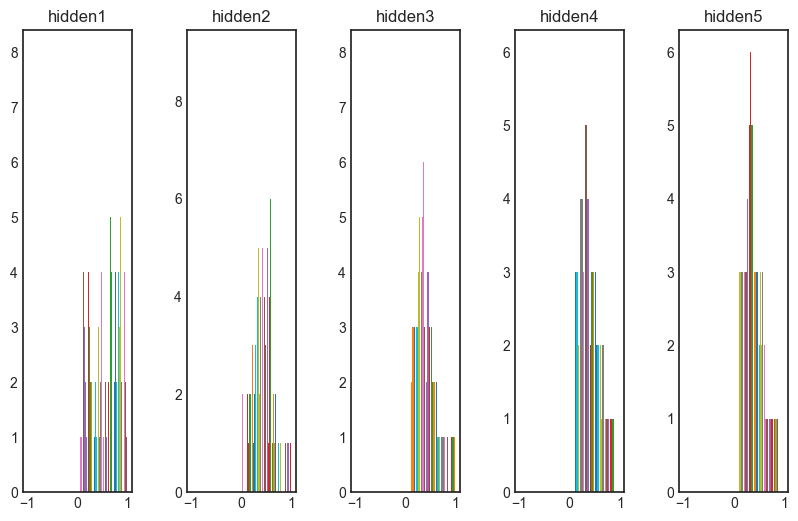

In [12]:
# He 균일분포 초기화
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

#### 비선형 함수 가중치 초기화
* 선형 - sigmoid, 비선형 - Relu

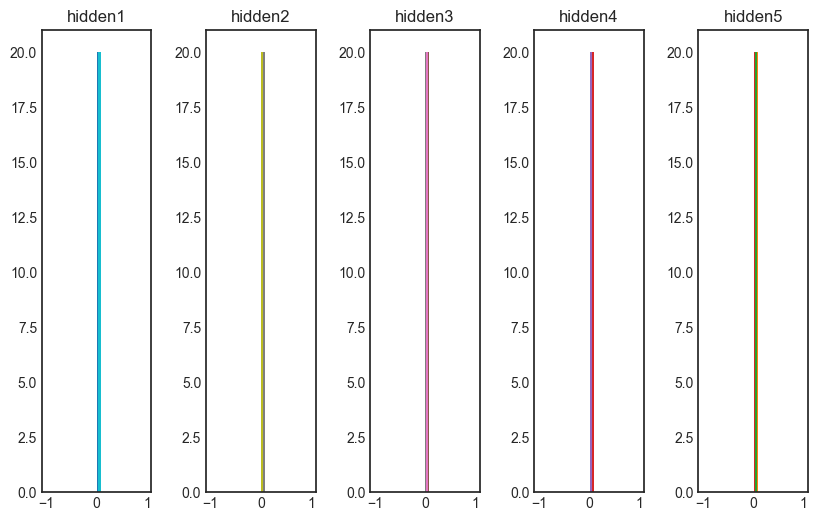

In [13]:
# 제로 초기화
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

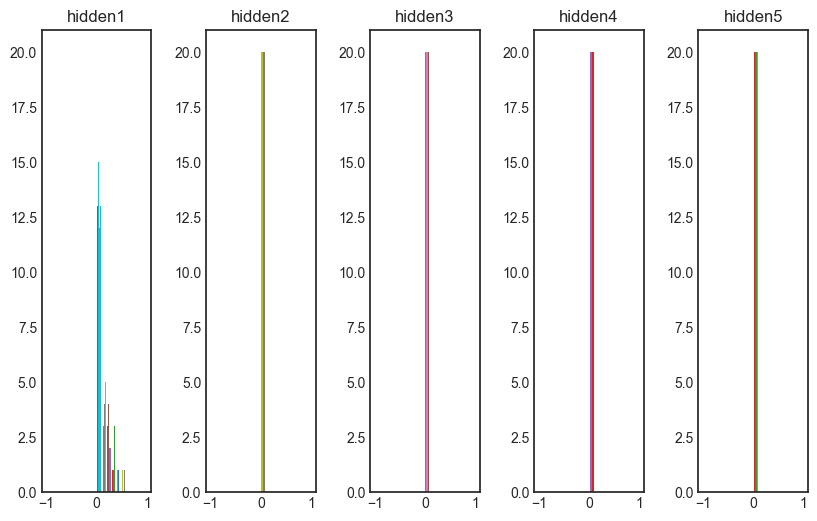

In [14]:
# 정규분포 초기화
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

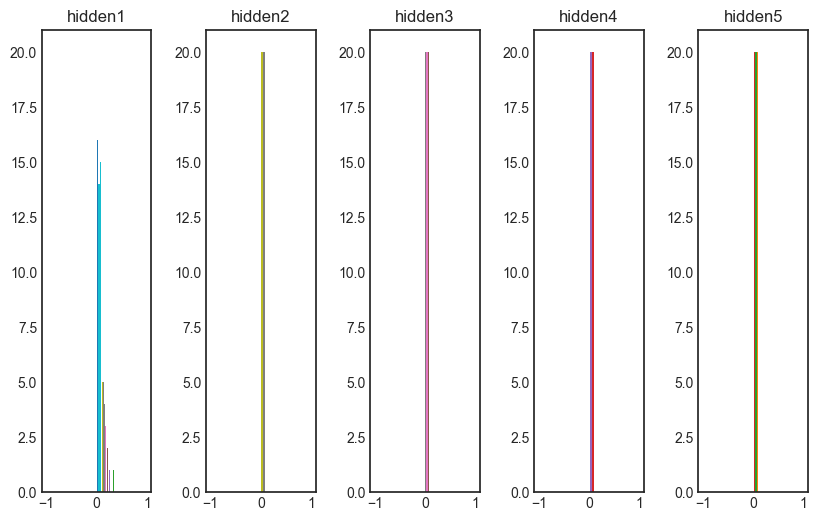

In [15]:
# 균일분포 초기화
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

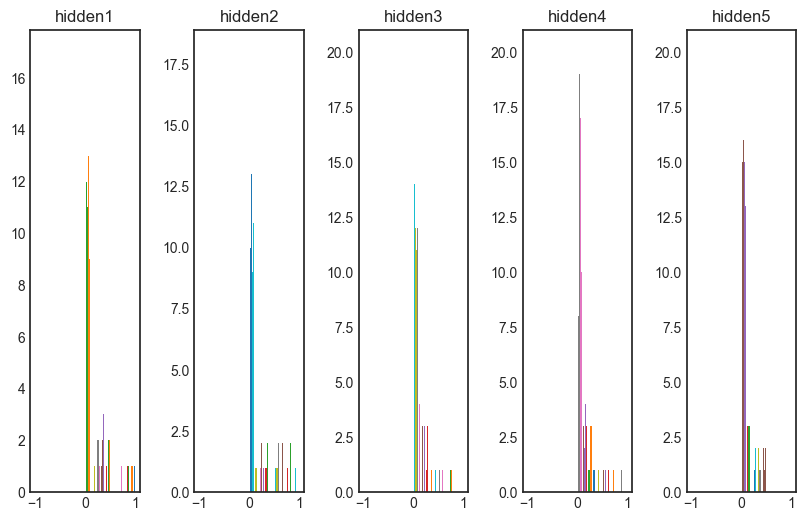

In [16]:
# Xavier(Glorot) 정규분포 초기화
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

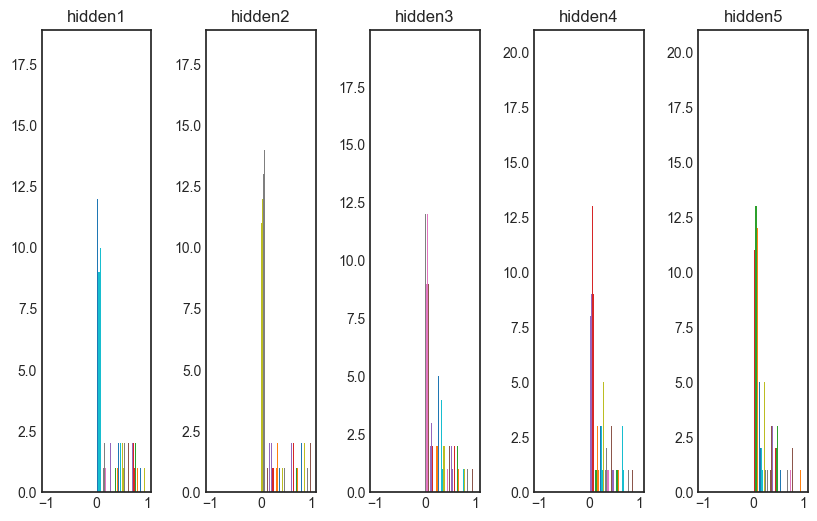

In [17]:
# Xavier(Glorot) 균일분포 초기화
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

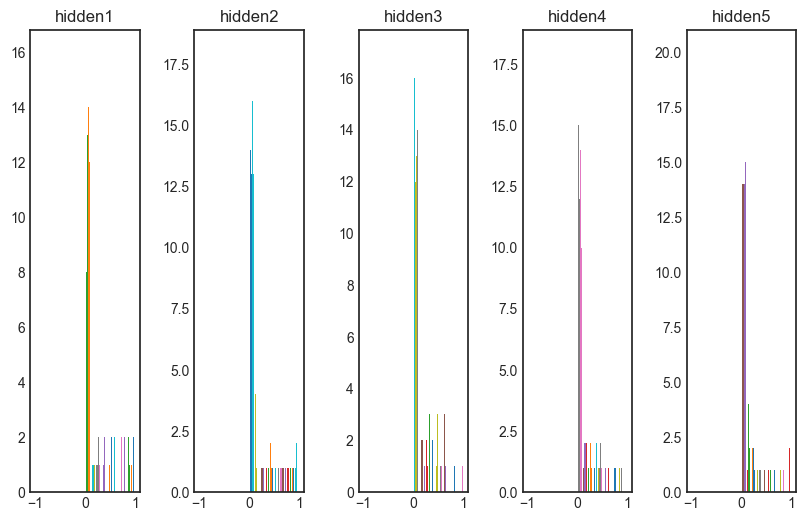

In [18]:
# He 정규분포 초기화
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

* He 초기화는 일반적으로 비선형 함수에 더 적합함

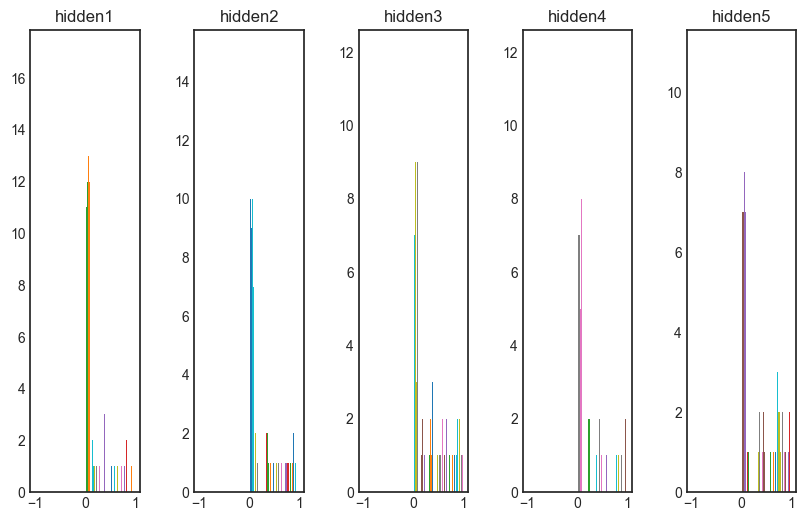

In [21]:
# He 균일분포 초기화
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

In [22]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

8982
2246
46


In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers

# Dense레이어와 Activation활성함수 레이어 사이에 추가해야함
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) 
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 128)             